In [1]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.append('../..')
from data.data_loader import get_splits
from utils.plot import plot_2D

# Reading and displaying data from file full_encoded.csv
dataFull = get_splits('../../data/encoded_data/full_encoded.csv', 0.2)

X_trainFull = dataFull['X_train']
y_trainFull = dataFull['Y_train']
X_testFull = dataFull['X_test']
y_testFull = dataFull['Y_test']

display(X_trainFull)
display(y_trainFull)
display(X_testFull)
display(y_testFull)




starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
99683,0.380952,1.00,0.666667,0.004800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68153,0.371429,0.50,0.666667,0.001700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9149,0.076190,0.75,0.333333,0.008000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75965,0.038095,0.75,0.333333,0.003312,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116558,0.019048,1.00,0.500000,0.004785,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63610,0.066667,0.75,0.333333,0.001580,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39222,0.133333,0.75,0.666667,0.011900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78630,0.076190,0.75,0.333333,0.009783,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51519,0.180952,0.75,0.500000,0.016000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


99683     2.569424e-06
68153     1.861096e-06
9149      1.665264e-06
75965     3.887469e-06
116558    6.665224e-06
              ...     
63610     4.581908e-06
39222     3.055253e-06
78630     3.609693e-06
51519     8.333266e-07
13912     6.387449e-06
Name: price, Length: 94037, dtype: float64

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
83313,0.076190,0.75,0.333333,0.007964,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88871,0.066667,0.75,0.333333,0.007400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74896,0.057143,0.75,0.333333,0.008100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55569,0.085714,0.75,0.666667,0.013950,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83180,0.180952,0.50,0.666667,0.018708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28787,0.057143,0.50,0.333333,0.007039,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88623,0.104762,0.75,0.333333,0.009876,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79553,0.085714,1.00,0.666667,0.007300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109393,0.057143,1.00,0.500000,0.005100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


83313     3.608304e-06
88871     1.665264e-06
74896     4.708296e-06
55569     8.305489e-06
83180     1.388878e-07
              ...     
28787     1.513877e-06
88623     1.387489e-06
79553     5.555511e-06
109393    5.972174e-06
108345    4.166633e-06
Name: price, Length: 23510, dtype: float64

In [128]:
X_trainFull,X_valFull,y_trainFull,y_valFull = train_test_split(X_trainFull, y_trainFull, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainFull.shape[0]))
print("Validation set has an example of {}.".format(X_valFull.shape[0]))
print("The test set has an example of {}.".format(X_testFull.shape[0]))

X_trainFull=np.array(X_trainFull) #lists are converted to numpy arrays
y_trainFull=np.array(y_trainFull)
X_valFull=np.array(X_valFull)
y_valFull=np.array(y_valFull)
X_testFull=np.array(X_testFull)
y_testFull=np.array(y_testFull)

The train set has an example of 70527.
Validation set has an example of 23510.
The test set has an example of 23510.


In [138]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=808))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainFull, y_trainFull, validation_data=(X_valFull, y_valFull), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreFull=price_predictor.evaluate(X_testFull,y_testFull,verbose=1)
display("The final model scores {} for test data.".format(TestscoreFull))
test_errs.append(TestscoreFull)
    
price_predictionFull=price_predictor.predict(X_testFull)
display(price_predictionFull)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 128)               103552    
_________________________________________________________________
dense_188 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_189 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_190 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_191 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_192 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 9         
Total para

'The final model scores [2.5018013159781506e-05, 0.0] for test data.'

array([[-4.6278583e-06],
       [-6.2222825e-06],
       [-2.4336623e-06],
       ...,
       [ 1.1092867e-05],
       [ 7.4569834e-06],
       [ 1.3959361e-06]], dtype=float32)

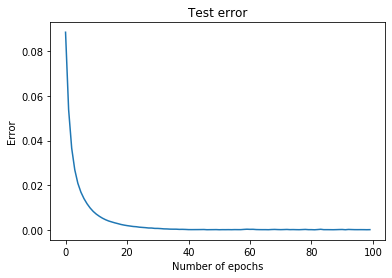

In [139]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

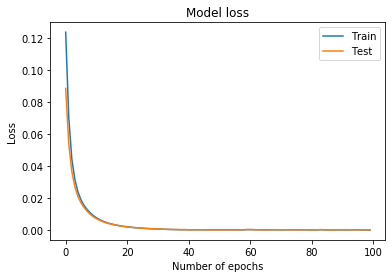

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

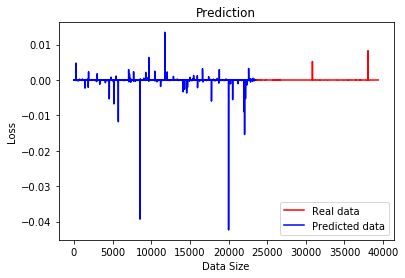

In [141]:
plt.plot(y_testAuto, color = 'red', label = 'Real data')
plt.plot(price_predictionFull, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data Size')
plt.title('Prediction')
plt.legend()
plt.show()

In [3]:
# Reading and displaying data from file autotrader_encoded.csv
dataAuto = get_splits('../../data/encoded_data/autotrader_encoded.csv', 0.2)

X_trainAuto = dataAuto['X_train']
y_trainAuto = dataAuto['Y_train']
X_testAuto = dataAuto['X_test']
y_testAuto = dataAuto['Y_test']

display(X_trainAuto)
display(y_trainAuto)
display(X_testAuto)
display(y_testAuto)


starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
170650,0.058333,0.75,0.005370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191467,0.116667,0.75,0.015671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128049,0.033333,0.50,0.002746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163017,0.141667,0.50,0.019487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61184,0.150000,0.75,0.010540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172600,0.033333,1.00,0.012240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188470,0.033333,0.50,0.003839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140696,0.041667,0.75,0.005210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28883,0.058333,0.50,0.018100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


170650    0.000002
191467    0.000006
128049    0.000004
163017    0.000001
61184     0.000001
            ...   
172600    0.000004
188470    0.000005
140696    0.000008
28883     0.000003
35140     0.000004
Name: price, Length: 157491, dtype: float64

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
110092,0.083333,0.50,0.008330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123306,0.116667,0.50,0.025371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176316,0.150000,1.00,0.017021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164479,0.233333,0.75,0.018900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178854,0.050000,0.75,0.005798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149455,0.008333,0.75,0.001261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151875,0.050000,0.75,0.009562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99354,0.033333,0.75,0.007286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66287,0.033333,0.75,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


110092    2.772200e-06
123306    1.276379e-06
176316    6.527725e-07
164479    6.249950e-07
178854    3.013865e-06
              ...     
149455    1.221935e-05
151875    1.916651e-06
99354     3.305529e-06
66287     4.165244e-06
23572     9.968809e-06
Name: price, Length: 39373, dtype: float64

In [99]:
X_trainAuto,X_valAuto,y_trainAuto,y_valAuto = train_test_split(X_trainAuto, y_trainAuto, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainAuto.shape[0]))
print("Validation set has an example of {}.".format(X_valAuto.shape[0]))
print("The test set has an example of {}.".format(X_testAuto.shape[0]))

X_trainAuto=np.array(X_trainAuto) #lists are converted to numpy arrays
y_trainAuto=np.array(y_trainAuto)
X_valAuto=np.array(X_valAuto)
y_valAuto=np.array(y_valAuto)
X_testAuto=np.array(X_testAuto)
y_testAuto=np.array(y_testAuto)

The train set has an example of 118118.
Validation set has an example of 39373.
The test set has an example of 39373.


In [119]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=755))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainAuto, y_trainAuto, validation_data=(X_valAuto, y_valAuto), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreAuto=price_predictor.evaluate(X_testAuto,y_testAuto,verbose=1)
display("The final model scores {} for test data.".format(TestscoreAuto))
test_errs.append(TestscoreAuto)
    
price_predictionAuto=price_predictor.predict(X_testAuto)
display(price_predictionAuto)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 128)               96768     
_________________________________________________________________
dense_148 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_149 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_150 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_151 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_152 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 9         
Total para

'The final model scores [0.0001234811904343417, 0.0] for test data.'

array([[-2.6731187e-04],
       [-2.1184032e-04],
       [ 4.8017321e-04],
       ...,
       [ 5.6808407e-05],
       [ 3.3327437e-05],
       [ 1.7293089e-05]], dtype=float32)

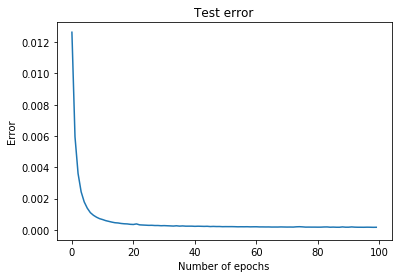

In [120]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

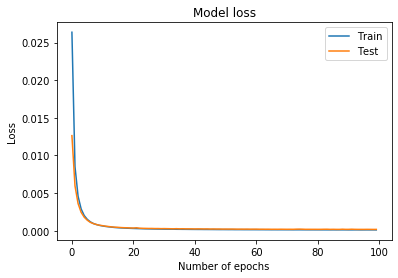

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

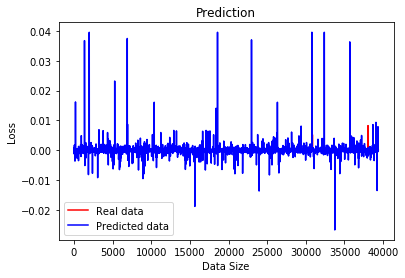

In [122]:
plt.plot(y_testAuto, color = 'red', label = 'Real data')
plt.plot(price_predictionAuto, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data Size')
plt.title('Prediction')
plt.legend()
plt.show()

In [4]:
# Reading and displaying data from file mechanical_encoded.csv
dataMech = get_splits('../../data/encoded_data/mechanical_encoded.csv', 0.2)

X_trainMech = dataMech['X_train']
y_trainMech = dataMech['Y_train']
X_testMech = dataMech['X_test']
y_testMech = dataMech['Y_test']

display(X_trainMech)
display(y_trainMech)
display(X_testMech)
display(y_testMech)

starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
51493,0.076190,0.500000,0.016481,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101256,0.028571,0.333333,0.009667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
51162,0.371429,0.666667,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
63814,0.142857,0.500000,0.014424,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117808,0.019048,0.333333,0.000858,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72534,0.038095,0.500000,0.007090,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81490,0.066667,0.333333,0.003982,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48391,0.123810,0.666667,0.024300,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133469,0.114286,0.500000,0.014700,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


51493     2.218871e-06
101256    1.777764e-06
51162     4.165244e-06
63814     8.055491e-07
117808    6.299116e-06
              ...     
72534     5.276347e-06
81490     2.220816e-06
48391     1.458322e-06
133469    2.359703e-06
121808    3.194419e-06
Name: price, Length: 120888, dtype: float64

,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
41577,0.285714,0.500000,0.019600,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14153,0.047619,0.333333,0.005242,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21013,0.038095,0.333333,0.005290,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8882,0.123810,0.666667,0.016077,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121556,0.114286,0.666667,0.016400,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72331,0.095238,0.666667,0.018719,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27105,0.038095,0.500000,0.004236,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38450,0.047619,0.666667,0.008398,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56070,0.142857,0.666667,0.020341,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


41577     2.777755e-07
14153     3.331918e-06
21013     6.083284e-06
8882      2.194427e-06
121556    1.249990e-06
              ...     
72331     2.916643e-06
27105     5.432179e-06
38450     9.999642e-06
56070     2.461925e-06
43238     1.263879e-05
Name: price, Length: 30222, dtype: float64

In [71]:
X_trainMech,X_valMech,y_trainMech,y_valMech = train_test_split(X_trainMech, y_trainMech, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainMech.shape[0]))
print("Validation set has an example of {}.".format(X_valMech.shape[0]))
print("The test set has an example of {}.".format(X_testMech.shape[0]))

X_trainMech=np.array(X_trainMech) #lists are converted to numpy arrays
y_trainMech=np.array(y_trainMech)
X_valMech=np.array(X_valMech)
y_valMech=np.array(y_valMech)
X_testMech=np.array(X_testMech)
y_testMech=np.array(y_testMech)

The train set has an example of 38249.
Validation set has an example of 12750.
The test set has an example of 30222.


In [133]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=35))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainMech, y_trainMech, validation_data=(X_valMech, y_valMech), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreMech=price_predictor.evaluate(X_testMech,y_testMech,verbose=1)
display("The final model scores {} for test data.".format(TestscoreMech))
test_errs.append(TestscoreMech)
    
price_predictionMech=price_predictor.predict(X_testMech)
display(price_predictionMech)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 128)               4608      
_________________________________________________________________
dense_174 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_175 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_176 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_177 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_178 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 9         
Total para


Epoch 00076: val_loss improved from 0.00126 to 0.00124, saving model to price_prediction.hdf5

Epoch 00077: val_loss improved from 0.00124 to 0.00124, saving model to price_prediction.hdf5

Epoch 00078: val_loss did not improve

Epoch 00079: val_loss did not improve

Epoch 00080: val_loss improved from 0.00124 to 0.00119, saving model to price_prediction.hdf5

Epoch 00081: val_loss improved from 0.00119 to 0.00118, saving model to price_prediction.hdf5

Epoch 00082: val_loss improved from 0.00118 to 0.00116, saving model to price_prediction.hdf5

Epoch 00083: val_loss improved from 0.00116 to 0.00116, saving model to price_prediction.hdf5

Epoch 00084: val_loss did not improve

Epoch 00085: val_loss improved from 0.00116 to 0.00115, saving model to price_prediction.hdf5

Epoch 00086: val_loss improved from 0.00115 to 0.00111, saving model to price_prediction.hdf5

Epoch 00087: val_loss improved from 0.00111 to 0.00110, saving model to price_prediction.hdf5

Epoch 00088: val_loss impro

'The final model scores [0.0009732843508989399, 0.0] for test data.'

array([[ 4.6850299e-05],
       [-9.5619704e-05],
       [-8.4302272e-05],
       ...,
       [-8.6224522e-05],
       [-2.0747527e-04],
       [-3.3060904e-05]], dtype=float32)

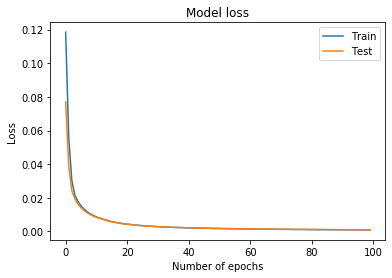

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

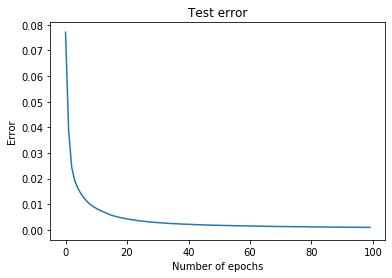

In [135]:
import matplotlib.pyplot as plt
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

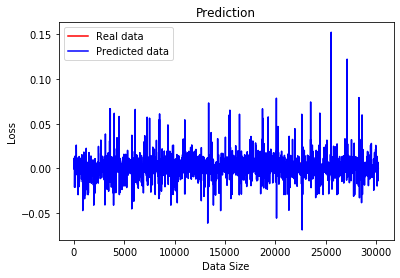

In [136]:
plt.plot(y_testMech, color = 'red', label = 'Real data')
plt.plot(price_predictionMech, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data Size')
plt.title('Prediction')
plt.legend()
plt.show()